# Understanding  Bussiness Case

### Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

# Domain Analysis

### 1. **date**: 
   - **Domain**: This attribute represents the date on which the sensor readings were recorded.
   - **Format**: Typically in a standard date format like YYYY-MM-DD.

2. **time**: 
   - **Domain**: This attribute indicates the specific time at which the sensor data was captured.
   - **Format**: Usually in a format such as HH:MM:SS (hours, minutes, seconds) or a timestamp format.

3. **username**: 
   - **Domain**: This attribute identifies the individual who was performing the activity. It could be a unique identifier or a username.
   - **Format**: It can be alphanumeric, including letters, numbers, and possibly special characters.

4. **wrist**: 
   - **Domain**: This attribute indicates the wrist on which the sensor was worn. It typically identifies which wrist (e.g., left or right).
   - **Format**: Categorical values such as "left" or "right" and numrical values as 0 and 1.

5. **activity**: 
   - **Domain**: This attribute describes the type of activity the user was performing during the sensor data capture.
   - **Format**: Categorical values representing different activities (e.g., "walking", "running", "sitting", "standing").

6. **acceleration_x**: 
   - **Domain**: This attribute represents the acceleration measured along the x-axis of the sensor.
   - **Format**: Numeric values, often in units like meters per second squared (m/s²).

7. **acceleration_y**: 
   - **Domain**: This attribute represents the acceleration measured along the y-axis of the sensor.
   - **Format**: Numeric values, usually in units like meters per second squared (m/s²).

8. **acceleration_z**: 
   - **Domain**: This attribute represents the acceleration measured along the z-axis of the sensor.
   - **Format**: Numeric values, typically in units like meters per second squared (m/s²).

9. **gyro_x**: 
   - **Domain**: This attribute captures the gyroscopic rotation rate around the x-axis.
   - **Format**: Numeric values, often in units like degrees per second (°/s) or radians per second (rad/s).

10. **gyro_y**: 
    - **Domain**: This attribute captures the gyroscopic rotation rate around the y-axis.
    - **Format**: Numeric values, commonly in units like degrees per second (°/s) or radians per second (rad/s).

11. **gyro_z**: 
    - **Domain**: This attribute captures the gyroscopic rotation rate around the z-axis.
    - **Format**: Numeric values, generally in units like degrees per second (°/s) or radians per second (rad/s).

Overall, these attributes provide a comprehensive view of the motion data collected during various activities, combining temporal information, user identification, activity types, and detailed sensor readings.

# Basic Checks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('walkrun.csv')
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
for i in data:
    print(i,':',data[i].unique())
    print('====================================================================================================')

date : ['2017-6-30' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17'
 '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7' '2017-7-9']
time : ['13:51:15:847724020' '13:51:16:246945023' '13:51:16:446233987' ...
 '20:9:15:717828989' '20:9:15:917932987' '20:9:16:117410004']
username : ['viktor']
wrist : [0 1]
activity : [0 1]
acceleration_x : [0.265  0.6722 0.4399 ... 0.5671 0.6287 0.4478]
acceleration_y : [-0.7814 -1.1233 -1.4817 ... -1.4259 -1.4467 -1.4213]
acceleration_z : [-0.0076 -0.2344  0.0722 ... -0.5238 -0.0154 -0.5407]
gyro_x : [-0.059  -0.1757 -0.9105 ...  0.5324 -1.45    0.1183]
gyro_y : [ 0.0325  0.0208  0.1063 ... -0.9116  2.0124 -1.2565]
gyro_z : [-2.9296  0.1269 -2.4367 ... -1.0889  2.5342  0.6048]


In [6]:
data.activity.unique()

array([0, 1], dtype=int64)

In [7]:
data.wrist.unique()

array([0, 1], dtype=int64)

In [8]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [9]:
data.describe(include='O')


,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


# EDA

### Univariate Analysis

In [10]:

for i in data:
    if(data[i].dtype=='object')and(len(data[i].unique())<=20):
        print(i,':',data[i].unique())
        
        print('================================================================================')


date : ['2017-6-30' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17'
 '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7' '2017-7-9']
username : ['viktor']


In [11]:
list_cat=['username','date']

In [12]:
list_cat

['username', 'date']

In [13]:
list_cat=data[list_cat]

In [14]:
type(list_cat)

pandas.core.frame.DataFrame

In [15]:
list_num=[]
for i in data:
    if(data[i].dtype!='object')and(len(data[i].unique())>20):
        list_num.append(i)
list_num.append('wrist')

In [16]:
list_num

['acceleration_x',
 'acceleration_y',
 'acceleration_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'wrist']

In [17]:
data1=data[list_num]

In [18]:
type(data1)

pandas.core.frame.DataFrame

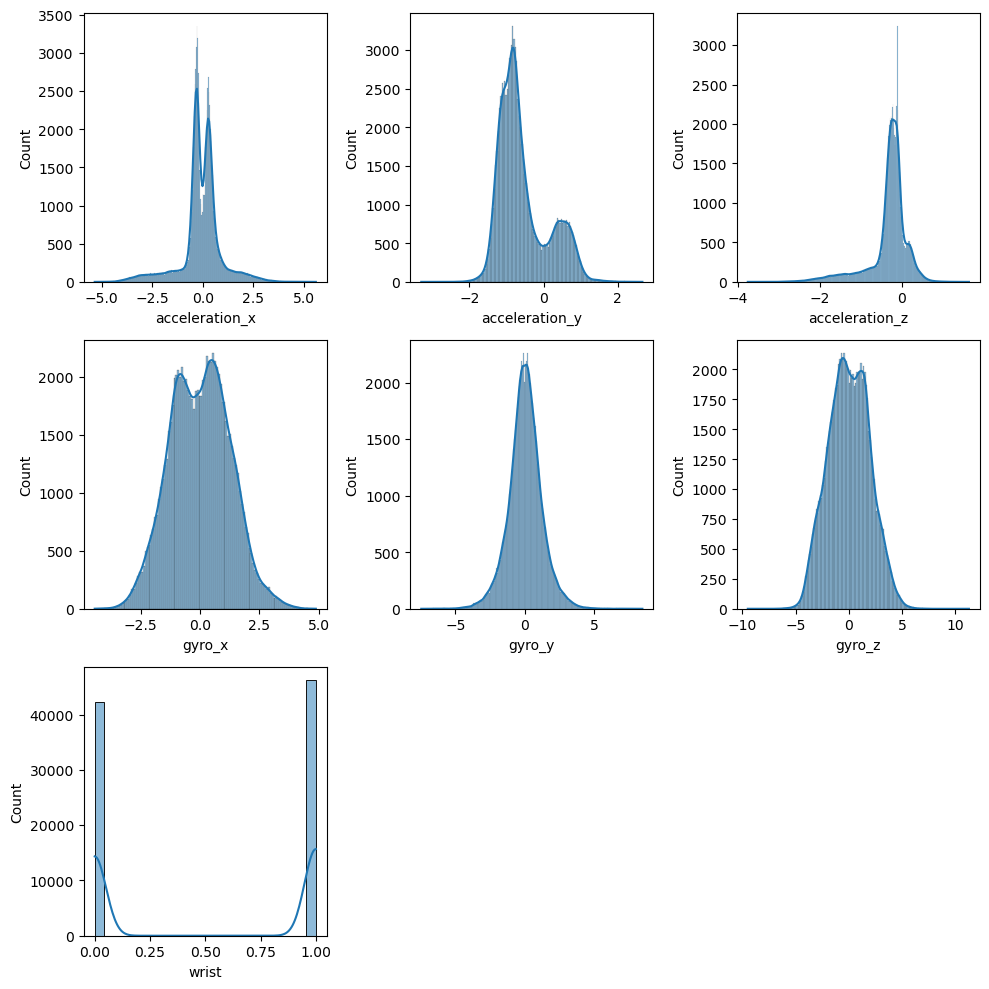

In [19]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in data1:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=data1[i],kde=True)
    plotnumber=plotnumber+1
plt.tight_layout()

## Insights:
#### acceleration_x: 
nearly 70 percent data points lies between -1 to 1 ,Skewness: The distribution is heavily skewed to the right, indicating that there are more extreme values (likely higher accelerations) on the right side of the distribution.
 * Peak: The peak of the distribution is around 0, suggesting that the most frequent acceleration values are close to zero.
 * Range: The acceleration values span a fairly wide range, from approximately -5 to 5.

#### acceleration_y:
* Skewness: The distribution is significantly skewed to the right, indicating that there are more data points with higher acceleration_y values compared to lower ones.
 * Modality: The histogram appears to be bimodal, suggesting there might be two distinct groups or clusters within the data. One cluster is centered around a lower acceleration_y value, while the other is centered around a higher value.
Central Tendency and Dispersion:
 * Mean: Since the distribution is skewed to the right, the mean will be greater than the median.
 * Data Outliers: The tail on the right side of the histogram might indicate outliers or unusual events that are not representative of the typical behavior.

#### acceleration_z:
* A histogram of the acceleration in the z-direction. The x-axis represents the acceleration values, and the y-axis represents the count of occurrences of each value. The histogram shows a clear peak around 0, indicating that most of the acceleration values are close to 0. There are also some smaller peaks at around -2 and 2, suggesting that there are some acceleration values in both positive and negative directions. Overall, the distribution of acceleration values appears to be centered around 0 with a relatively narrow spread.

#### gyro_x:
 * Distribution: The data is approximately normally distributed, with a peak around 0. This suggests that the gyroscope x-axis values are centered around 0, with most values falling within a certain range.
 * Range: The range of the data is approximately from -2.5 to 5.0. This indicates the maximum and minimum values observed in the gyroscope x-axis data.
 *  Spread: The spread of the data can be assessed by looking at the width of the distribution. A narrower distribution indicates that the data points are more tightly clustered around the mean, while a wider distribution suggests that the data points are more spread out. In this case, the distribution appears to be moderately spread out.
 * Symmetry: The distribution appears to be roughly symmetric around the mean, indicating that there is no significant bias in the data.

#### gyro_y:
1. Normal Distribution:
 * Shape: The distribution closely resembles a normal (Gaussian) distribution, characterized by a bell-shaped curve.
 * Central Tendency: The peak of the distribution, likely representing the mean or median of the data, is around 0. This suggests that the gyroscope's Y-axis readings are centered around zero.
2. Data Range:
 * Minimum and Maximum Values: The x-axis labels (-5 to 5) likely represent the range of gyroscope Y-axis values observed in the data.
 * Outliers: There appear to be no significant outliers or extreme values beyond the range of the distribution, indicating that the data is relatively consistent.

#### gyro_z:
 * Distribution Shape: The histogram exhibits a bell-curve shape, characteristic of a normal distribution. This suggests that the majority of "gyro_z" values cluster around a central point, with fewer values occurring at the extremes.
 * Central Tendency: The peak of the distribution appears to be around 0, indicating that this is the most common value for "gyro_z."
 * Spread: The width of the distribution, or the spread of values, seems relatively narrow. This suggests that the data points are clustered closely together around the central value, with less variability.
 * Outliers: There are no visible outliers, which are extreme values that deviate significantly from the majority of the data.

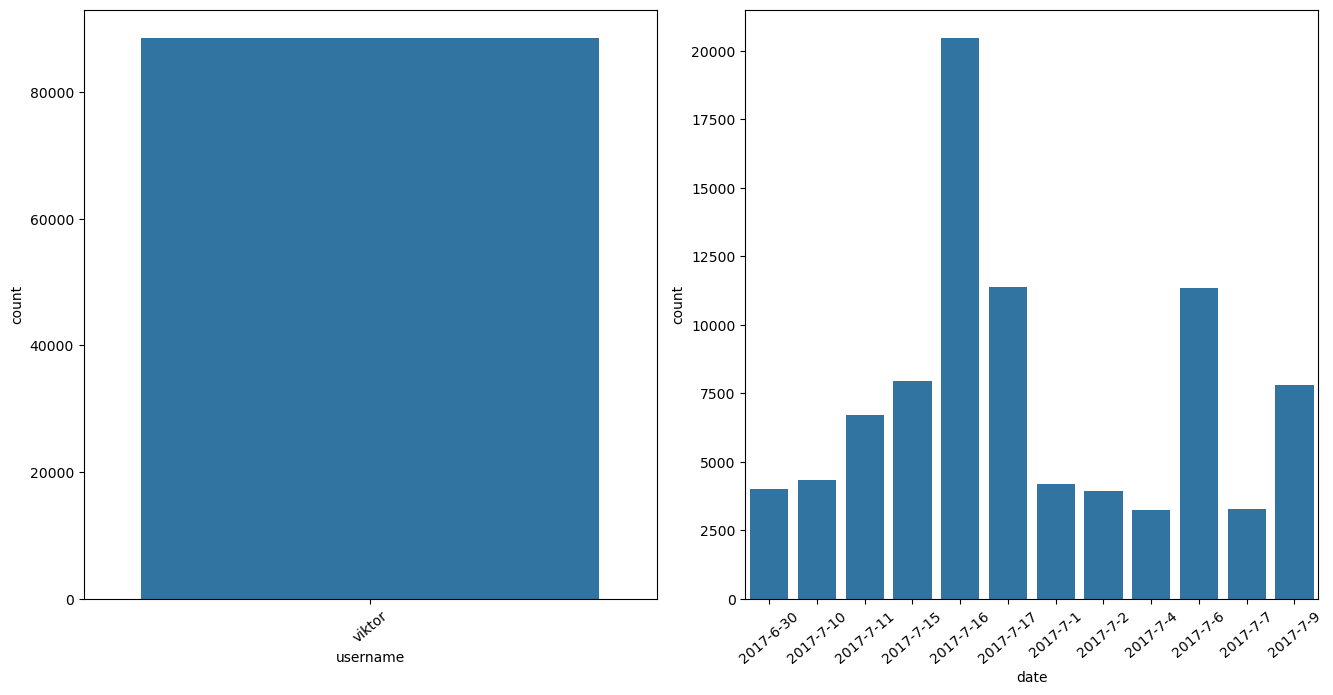

In [20]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(3,3,plotnumber)
    sns.countplot(x=list_cat[i])
    plt.xticks(rotation=40)
    plotnumber=plotnumber+1
plt.tight_layout()

## insights:

#### username:
* Single Data Point: The chart only displays one data point, which is the count associated with the username "viktor."

#### date:
 * Time Period: The x-axis is labeled "date," ranging from June 30, 2017 to July 9, 2017.
 * Count: The y-axis is labeled "count," indicating the quantity of events or occurrences.
 * Trend: There seems to be a general upward trend in the count from June 30th to July 1st, followed by a significant spike on July 2nd and then a gradual decline until July 9th.
 * Peak: The highest count occurs on July 16th, with a value of around 20,000.
 * Variability: The counts vary significantly from day to day, with some days having very high counts and others having relatively low counts.

### Bivariate Anaysis

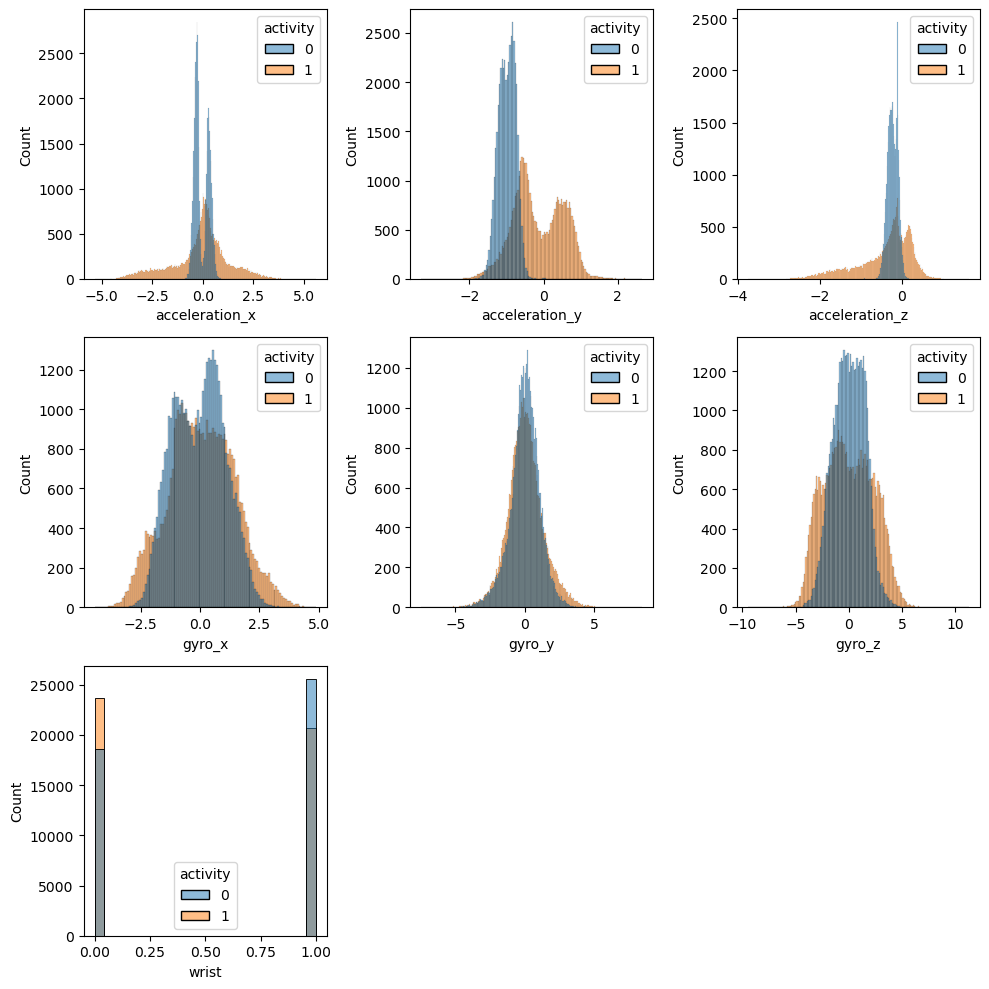

In [21]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in data1:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=data1[i],hue=data.activity)
    plotnumber=plotnumber+1
plt.tight_layout()

## insights:

#### acceleration_x:
histogram showing the distribution of acceleration_x values for two different activity : "0" and "1". The x-axis represents acceleration_x, while the y-axis represents the count of occurrences.
Key Observations:
 * Activity  0: The blue histogram likely represents the acceleration_x values for activity 0. It is centered around 0 with a relatively narrow spread, suggesting that the acceleration values for this level are generally close to 0.
 * Activity  1: The orange histogram likely represents the acceleration_x values for activity  1. It is centered slightly to the right of 0 with a wider spread, indicating that the acceleration values for this  are more variable and tend to be higher than those for  0.
 * Overlapping Distributions: There is some overlap between the two distributions, suggesting that there might be some overlap in acceleration values between the two activity . However, the overall shape and center of the distributions are distinct.
Possible Interpretations for Walking and Running:
 * Activity 0: Walking: Given the narrower distribution and center around 0, activity 0 could represent walking. Walking typically involves less intense acceleration compared to running.
 * Activity  1: Running: The wider distribution and shift to the right of 0 suggest that activity level 1 could represent running. Running involves more intense acceleration, with greater fluctuations in acceleration values.
Additional Considerations:

#### acceleration_y:
* Total Data Points: There are 88,588 data points in total.  

* Value '1' in Acceleration_y: The value 1 accounts for approximately 52.69% of the dataset, with a potential variability of ±3%.  

* Value '0' in Acceleration_y: The value 0 makes up around 40.48% of the data, also with a variability of ±3%.  

* Overlap of Data Points: There is a significant overlap in the data, with 6.63% of the data points overlapping with each other.  

* Distribution Insights: While the data appears to be randomly distributed overall, the highest concentration of values is found within the range of -0.1 to -1.7, specifically with the value 0.  

 
#### acceleration_z:
* Highest Overlap: The majority of overlapping data points are found in the range of -0.5 to 0.1, which has the highest count.  

* Value '1' Distribution: The range from -0.5 to -2.7 and the positive range 0.11 to 1.1 both show that the value 1 has the highest counts within these intervals.  

* Count of '0': The value 0 is also concentrated in the overlapping range of -0.5 to 0.1, contributing significantly to the highest count.  

* Acceleration_z Analysis:  

1) Value '1': The count for 1 in acceleration_z is 39,652, making up 44.80% of the dataset, indicating strong prominence.  
2) Value '0': The count for 0 in acceleration_z is 34,180, representing 38.60% of the dataset, showing substantial overlap with 1.

* Overall Overlap: The total count of overlapping values is 14,756, which is about 16.60% of the dataset.  

* Skewness: The data is negatively skewed, meaning that most data points are concentrated on the left side of the distribution.     


#### gyro_x:
* Distribution: The data points show a tendency towards a normal distribution, with significant overlap among values.   

* Count for Value '1': The value 1 appears 10,115 times, which is approximately 11.42% of the total dataset.  

* Count for Value '0': The value 0 has a count of 11,500, representing about 12.99% of the dataset.  

* Concentration of Values: A significant 77.60% of the data lies within the range of -2.7 to 2.7, totaling 66,973 occurrences, indicating a strong clustering around this central range.  



#### gyro_y:
* Kurtosis: The data distribution is highly peaked, indicating a high kurtosis, which suggests the presence of outliers or that most values are concentrated around the mean.  

* Overlap of Data Points: A significant portion of the data (93%) has overlapping values, with a count of 82,387 occurrences. This suggests a strong clustering of values around certain points.  

* Zero Value Count: There are 3,570 occurrences of the value 0, making up approximately 4.03% of the total dataset.  

* Count for Value '1': The value 1 appears 2,631 times, accounting for about 2.97% of the data.  

* Range: The gyro_y values are bounded between -5 and 5, which provides context for the distribution of your data.  
   
#### gyro_z:
* Kurtosis and Pointiness: The kurtosis of your data indicates a high degree of peakness, suggesting that the data has heavy tails and a sharp peak compared to a normal distribution.  

* Overlapped Data Points: A significant portion of your data, around 83.09%, consists of overlapping data points, indicating clustering at certain values.  

* Count of Zeros: The value 0 occurs 6,620 times, making up 7.47% of the dataset, which suggests that it is a significant value.  

* Count of Ones: The value 1 occurs 8,360 times, representing 9.44% of the dataset. This indicates that both 0 and 1 are notable points in your distribution.  

* Overall Pickiness: The data’s high pickiness implies that it is concentrated around a few values rather than being spread out.  

* Value Range: The values of gyro_z range from -6 to 6, indicating the potential for both positive and negative deviations from the center.  



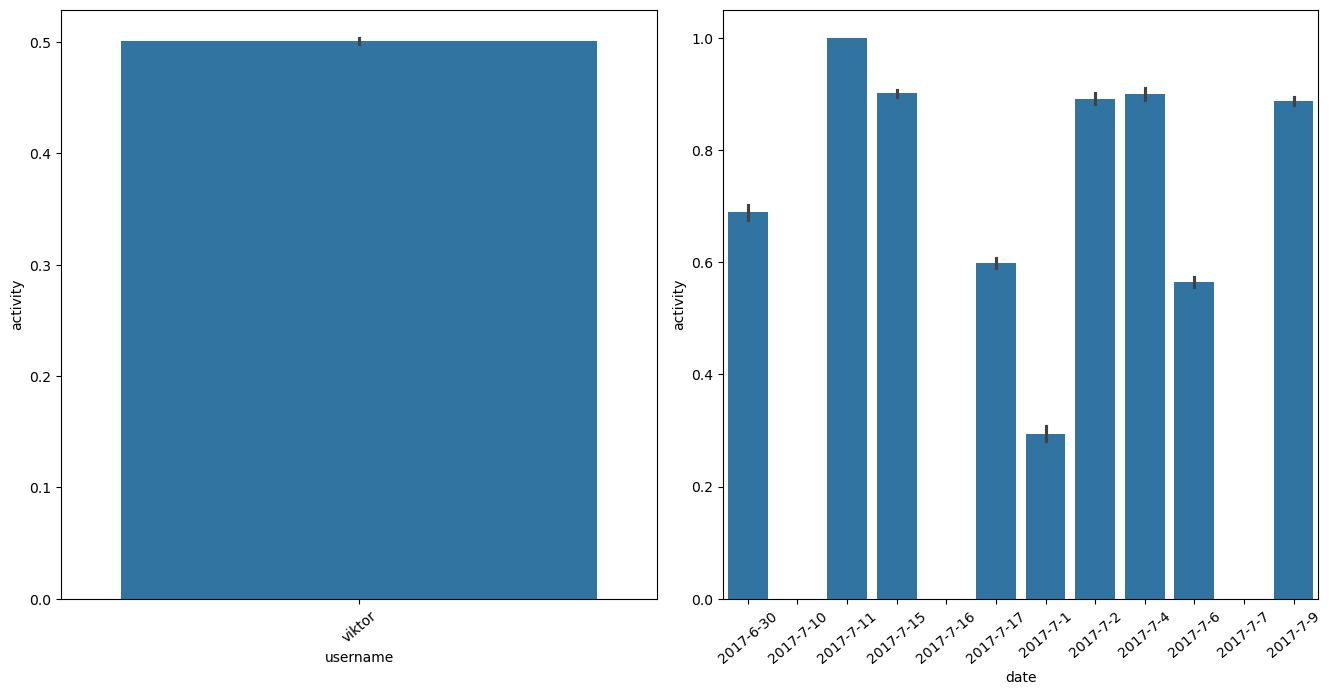

In [22]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in list_cat:
    plt.subplot(3,3,plotnumber)
    sns.barplot(x=list_cat[i],y=data.activity)
    plt.xticks(rotation=40)
    plotnumber=plotnumber+1
plt.tight_layout()

## Insights
#### Username:
There is no insights for this feature because column is singleton column  contains only one value that is 'viktor'  
#### date:
1)highest value for activity in date is on 2017-7-11   
2)  2017-7-7, 2017-7-16  and  2017-7-10 have  lowest value that is '0'     

# Data Preprocessing 

## 1)Handling With Null Values Corrupted Data :
 

In [23]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

## 2) Handling with Outliers :

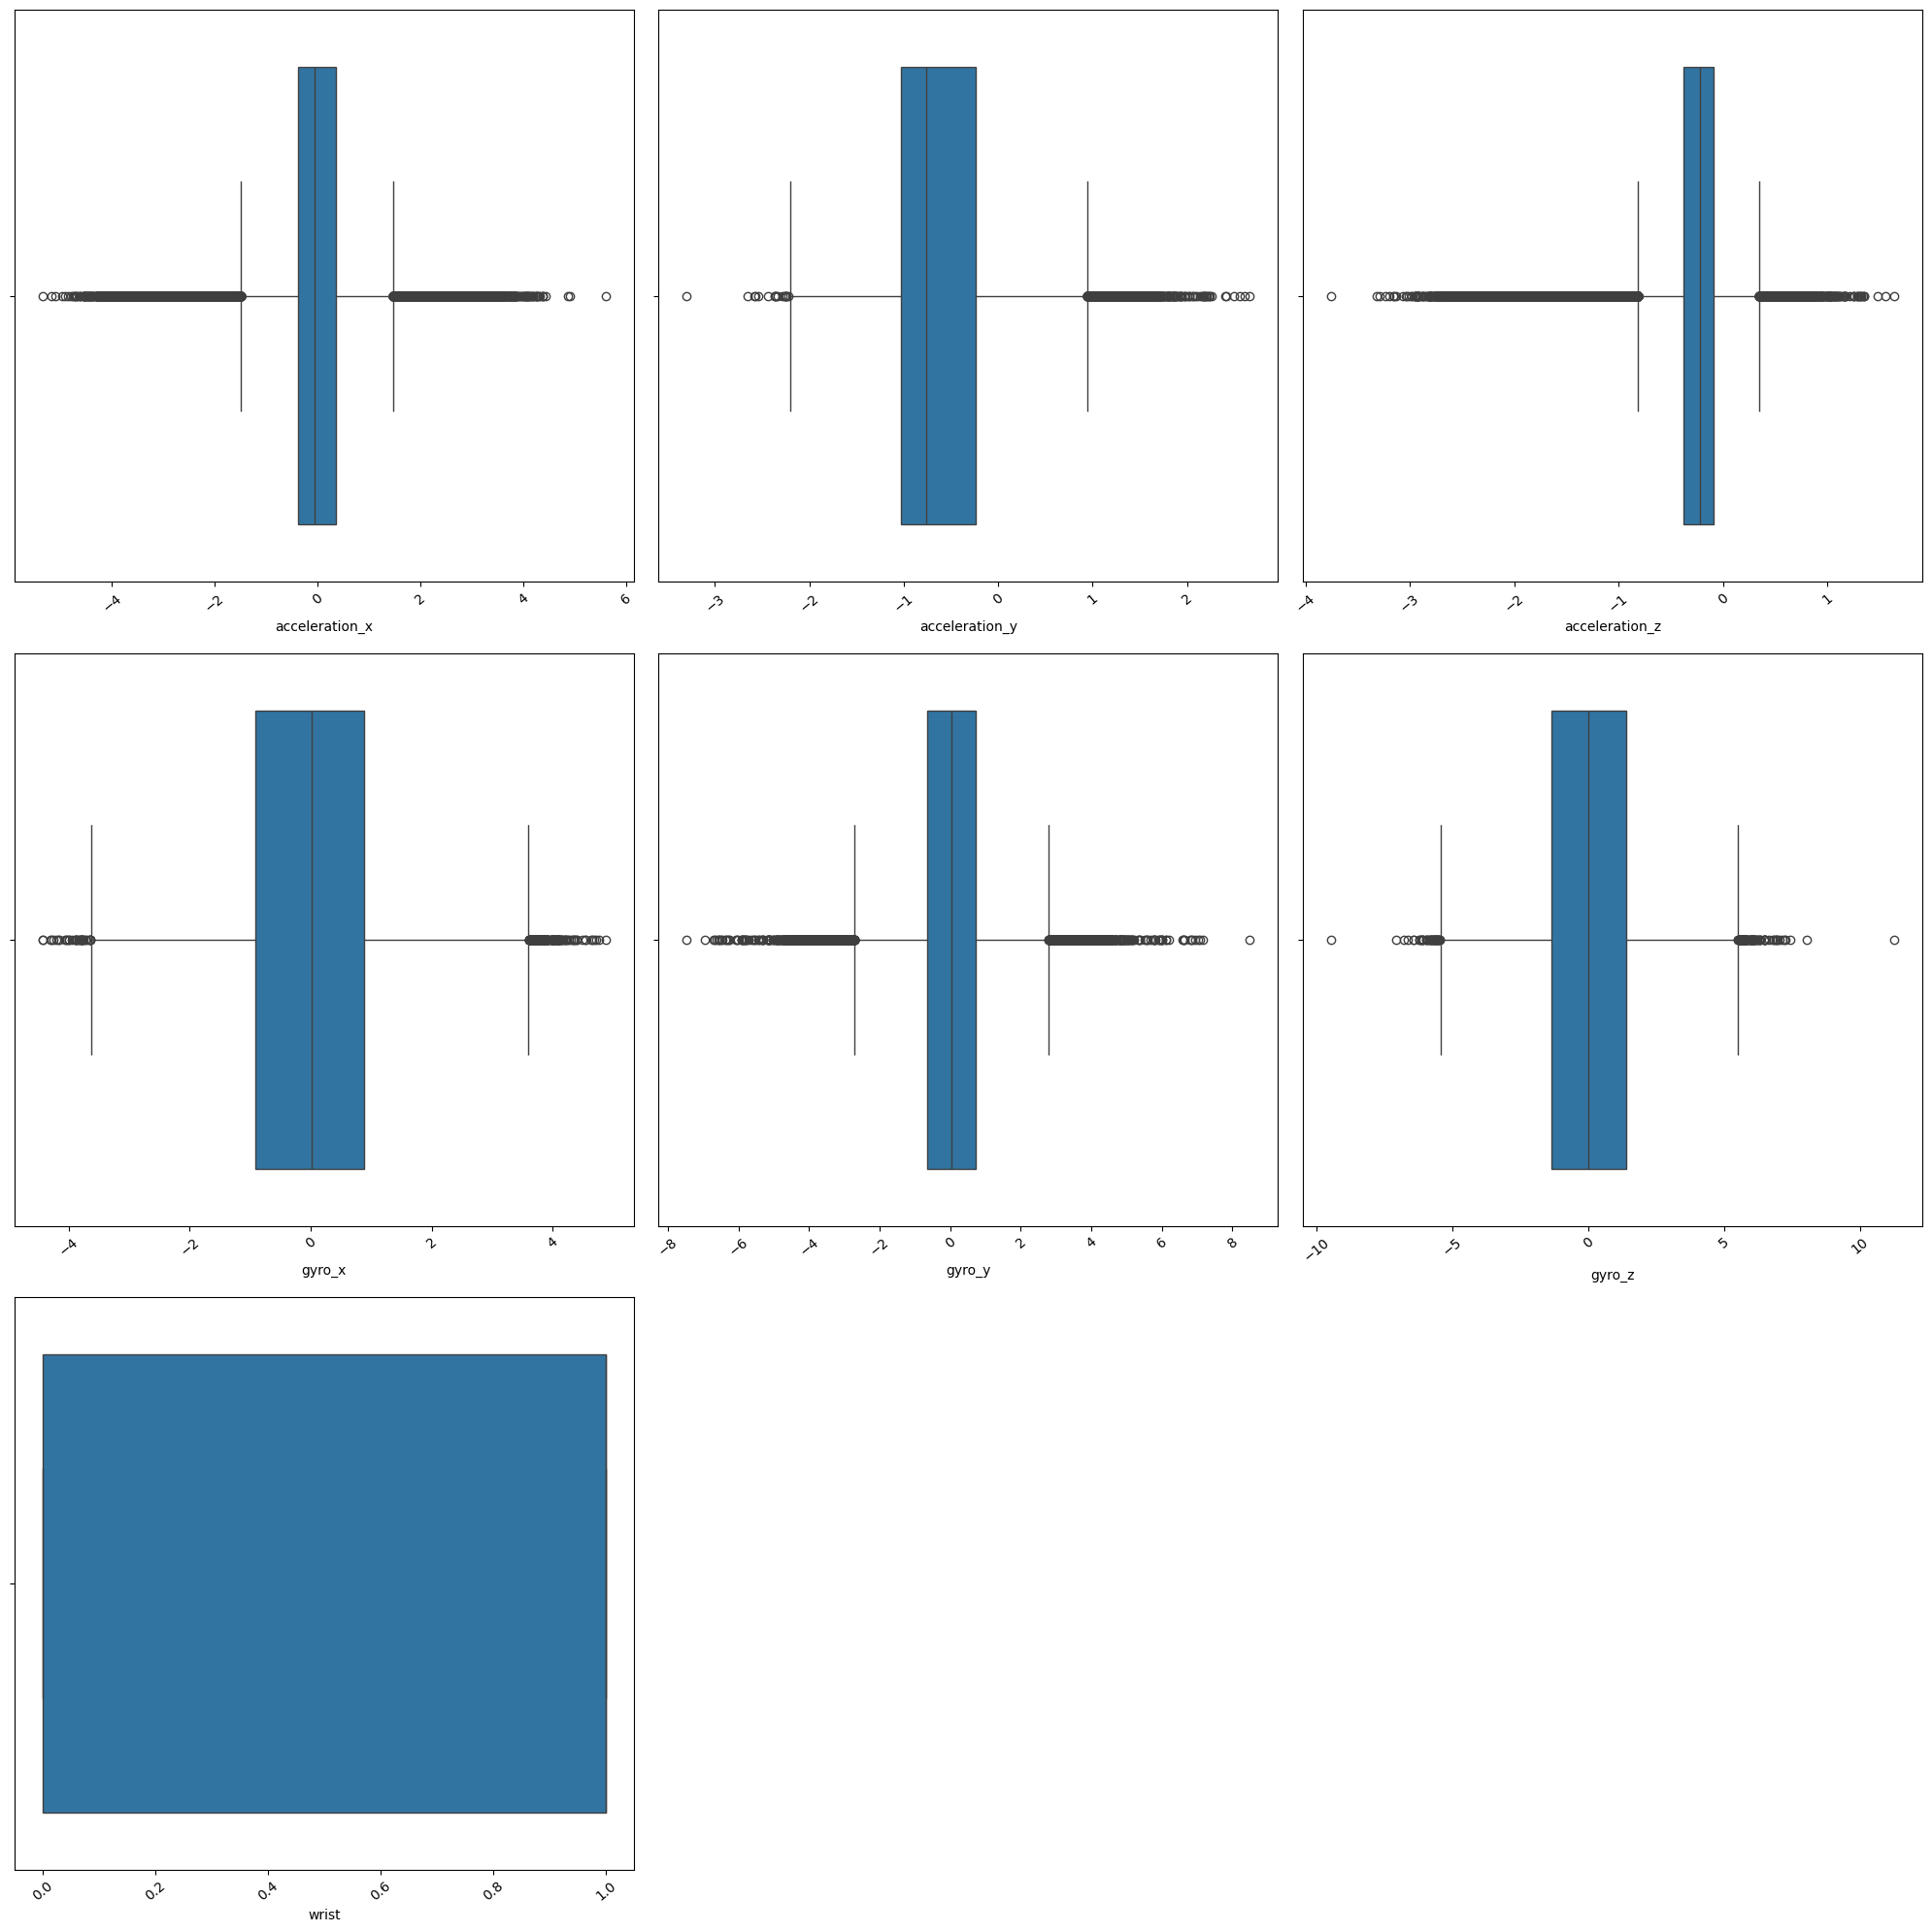

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in data1:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[i])
    plt.xticks(rotation=40)
    plotnumber=plotnumber+1
plt.tight_layout()

### IQR_VALURS

In [25]:
IQR=[]
for i in data1:
    a=stats.iqr(data[i], interpolation='midpoint')
    IQR.append(a)
    print(i,':',a)
print(IQR)

acceleration_x : 0.7373
acceleration_y : 0.7917500000000001
acceleration_z : 0.2901
gyro_x : 1.8094999999999999
gyro_y : 1.3785500000000002
gyro_z : 2.74345
wrist : 1.0
[0.7373, 0.7917500000000001, 0.2901, 1.8094999999999999, 1.3785500000000002, 2.74345, 1.0]


### Q1_VALUES

In [26]:
Q1_values=[]
for i in data1:
    q1=data[i].quantile(0.25)
    Q1_values.append(q1)
    print(i,':',q1)

acceleration_x : -0.3818
acceleration_y : -1.0335
acceleration_z : -0.376
gyro_x : -0.9207
gyro_y : -0.644825
gyro_z : -1.345125
wrist : 0.0


### Q3_VALUES

In [27]:
Q3_values=[]
for i in data1:
    q3=data[i].quantile(0.75)
    Q3_values.append(q3)
    print(i,':',q3)

acceleration_x : 0.3555
acceleration_y : -0.241775
acceleration_z : -0.0859
gyro_x : 0.8888
gyro_y : 0.7337
gyro_z : 1.3982
wrist : 1.0


## acceleration_x

<Axes: xlabel='acceleration_x'>

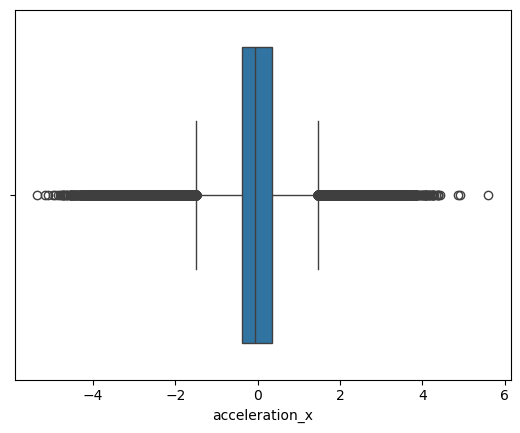

In [28]:
sns.boxplot(x=data.acceleration_x)

In [29]:
upper_limit=0.3555+1.5*0.7373
upper_limit

1.46145

In [30]:
lower_limit=-0.3818-1.5*0.7373
lower_limit

-1.48775

In [31]:
data.loc[data['acceleration_x']>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
761,2017-6-30,20:33:45:457786977,viktor,0,1,1.5466,-1.1082,-0.2509,0.8609,-0.4994,-1.6458
794,2017-6-30,20:33:52:57748019,viktor,0,1,1.5584,-1.0274,-0.3310,-1.1249,2.3090,3.4477
804,2017-6-30,20:33:54:58786988,viktor,0,1,3.3880,-0.1490,-0.1416,1.8600,1.8447,-1.7263
806,2017-6-30,20:34:1:757506012,viktor,0,1,2.1690,-0.8969,-0.4853,-1.0288,3.0830,3.2277
807,2017-6-30,20:34:1:957579970,viktor,0,1,3.4887,-1.0723,-0.1066,2.3324,-1.1111,-2.1490
...,...,...,...,...,...,...,...,...,...,...,...
87729,2017-7-9,20:6:10:716030001,viktor,0,1,2.2489,-0.5623,-1.8833,-0.1630,0.0703,-2.8685
87731,2017-7-9,20:6:11:115936994,viktor,0,1,1.8530,-1.2641,-1.9198,-0.5848,1.1991,1.8042
87737,2017-7-9,20:6:12:315982997,viktor,0,1,1.4954,-1.0511,-1.6060,0.4787,-1.2197,-2.4586
87752,2017-7-9,20:6:15:315971016,viktor,0,1,2.5963,-0.4055,-2.4827,0.2144,0.2478,-2.0818


In [32]:
np.median(data.acceleration_x)

-0.0595

In [33]:
data.loc[data['acceleration_x']>upper_limit,'acceleration_x']=np.median(data.acceleration_x)

In [34]:
data.loc[data['acceleration_x']<lower_limit,'acceleration_x']=np.median(data.acceleration_x)

<Axes: xlabel='acceleration_x'>

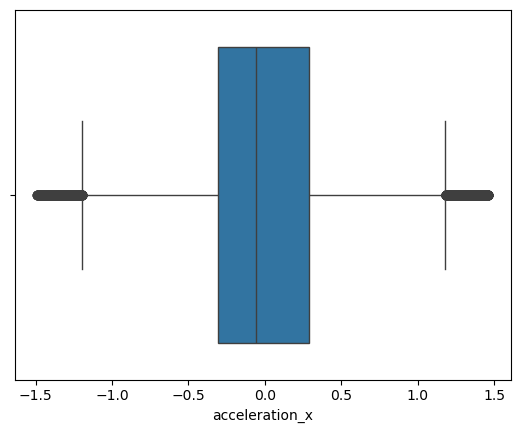

In [35]:
sns.boxplot(x=data.acceleration_x)

# acceleration_y

<Axes: xlabel='acceleration_y'>

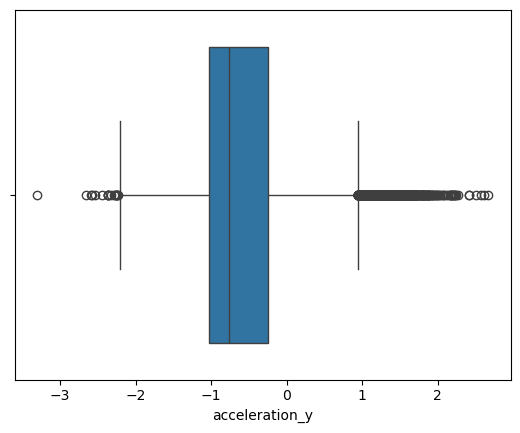

In [36]:
sns.boxplot(x=data.acceleration_y)

In [37]:
upper_limit=-0.241775+1.5*0.7917500000000001
upper_limit

0.9458500000000002

In [38]:
lower_limit=-1.0335-1.5*0.7917500000000001
lower_limit

-2.2211250000000002

In [39]:
data.loc[data['acceleration_y']>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
803,2017-6-30,20:33:53:857743978,viktor,0,1,0.5458,1.0347,-0.2085,-1.3673,0.6324,0.7227
814,2017-6-30,20:34:3:357452988,viktor,0,1,0.0456,1.0885,-0.2076,0.0650,-0.2160,-1.0235
818,2017-6-30,20:34:4:157447993,viktor,0,1,0.1848,0.9479,-0.2640,-0.1240,0.0956,-0.6674
822,2017-6-30,20:34:4:957527995,viktor,0,1,-0.0065,0.9514,-0.0914,-0.3194,0.1613,-0.5796
826,2017-6-30,20:34:5:757667005,viktor,0,1,0.1477,1.0921,-0.2145,0.4663,-0.2417,-1.7537
...,...,...,...,...,...,...,...,...,...,...,...
87635,2017-7-9,20:6:31:516337990,viktor,0,1,0.5270,1.0484,-0.5358,-0.6155,-0.9295,-0.3219
87639,2017-7-9,20:6:32:315617978,viktor,0,1,0.0657,1.0242,-0.2410,-0.7306,-0.1505,-1.1490
87643,2017-7-9,20:6:33:116357982,viktor,0,1,-0.2425,0.9598,-0.1213,-0.1654,-0.0856,-2.0006
87709,2017-7-9,20:6:6:716341972,viktor,0,1,-0.1979,1.0738,-0.0464,-1.0136,0.7744,-0.7605


In [40]:
data.loc[data['acceleration_y']>upper_limit,'acceleration_y']=np.median(data.acceleration_y)

In [41]:
data.loc[data['acceleration_y']<lower_limit,'acceleration_y']=np.median(data.acceleration_y)

<Axes: xlabel='acceleration_y'>

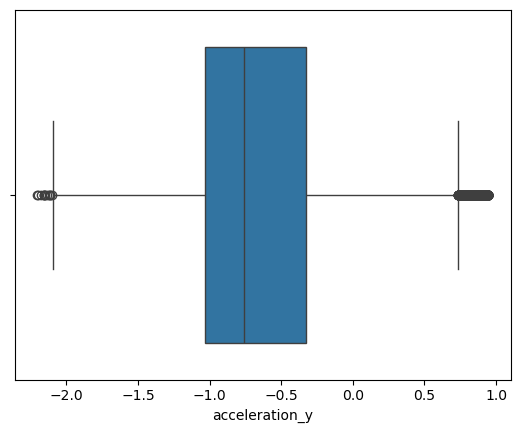

In [42]:
sns.boxplot(x=data.acceleration_y)

## acceleration_z

<Axes: xlabel='acceleration_z'>

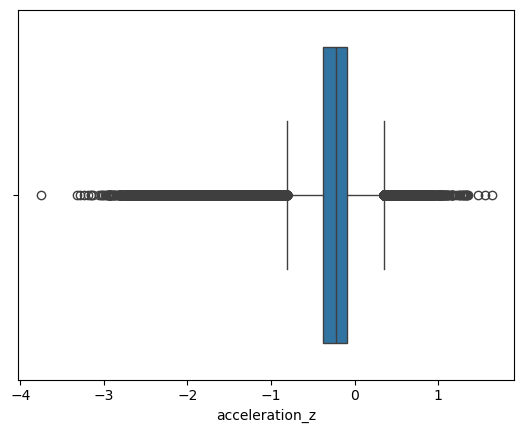

In [43]:
sns.boxplot(x=data.acceleration_z)

In [44]:
upper_limit=-0.0859+1.5*0.2901
upper_limit

0.34925000000000006

In [45]:
lower_limit=-0.376-1.5*0.2901
lower_limit

-0.81115

In [46]:
data.loc[data['acceleration_z']>upper_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
1041,2017-6-30,20:35:30:306410014,viktor,0,1,-0.4445,-0.7503,0.3621,0.6251,-0.3076,1.3586
1049,2017-6-30,20:35:31:907021999,viktor,0,1,-0.4780,-0.5880,0.4134,-0.0926,-0.2095,0.9744
1057,2017-6-30,20:35:33:506633996,viktor,0,1,-0.4274,-0.5622,0.3604,-0.0346,-0.1810,1.2706
1061,2017-6-30,20:35:34:306286990,viktor,0,1,-0.5723,-0.5994,0.3602,1.1863,-0.5626,0.3163
1078,2017-6-30,20:35:54:389981985,viktor,0,1,-0.1973,-0.7251,0.3757,-1.2883,0.4394,2.8567
...,...,...,...,...,...,...,...,...,...,...,...
87641,2017-7-9,20:6:32:716583013,viktor,0,1,-0.6279,-0.5212,0.5046,1.4158,0.1346,0.8172
87707,2017-7-9,20:6:6:316078007,viktor,0,1,-0.5376,-0.3564,0.4843,1.2667,-0.4164,0.4760
87711,2017-7-9,20:6:7:116213977,viktor,0,1,-0.5455,-0.3352,0.5220,0.9665,0.5541,2.4329
87730,2017-7-9,20:6:10:915977001,viktor,0,1,-0.7480,-0.4755,0.5966,1.5635,-0.0745,0.2933


In [47]:
data.loc[data['acceleration_z']<lower_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
817,2017-6-30,20:34:3:957686007,viktor,0,1,-0.0595,-1.0998,-0.8614,-0.5602,-0.6288,2.4683
821,2017-6-30,20:34:4:757453978,viktor,0,1,-0.0595,-0.9437,-0.9767,-1.3681,0.7702,2.3239
825,2017-6-30,20:34:5:556971013,viktor,0,1,-0.0595,-1.4509,-1.0165,-0.9526,-0.4552,3.0044
829,2017-6-30,20:34:6:357590019,viktor,0,1,-0.0595,-1.5968,-1.1892,-0.5883,-0.5169,2.6865
831,2017-6-30,20:34:6:757507026,viktor,0,1,-0.0595,-0.9753,-0.9276,0.9348,-1.2662,-3.0832
...,...,...,...,...,...,...,...,...,...,...,...
87743,2017-7-9,20:6:13:515973985,viktor,0,1,0.8215,0.2774,-0.8815,-0.8177,1.7098,1.3636
87748,2017-7-9,20:6:14:516231000,viktor,0,1,0.9145,0.1193,-1.0218,-0.4442,-0.4101,-3.0229
87750,2017-7-9,20:6:14:916516005,viktor,0,1,0.4733,-0.8527,-1.1410,0.6127,1.6790,4.8951
87752,2017-7-9,20:6:15:315971016,viktor,0,1,-0.0595,-0.4055,-2.4827,0.2144,0.2478,-2.0818


In [48]:
data.loc[data['acceleration_z']>upper_limit,'acceleration_z']=np.median(data.acceleration_z)

In [49]:
data.loc[data['acceleration_z']<lower_limit,'acceleration_z']=np.median(data.acceleration_z)

<Axes: xlabel='acceleration_z'>

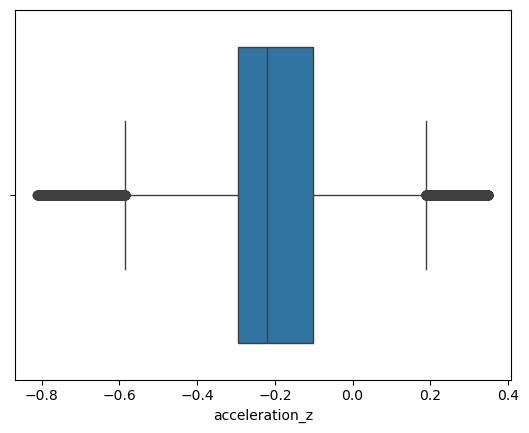

In [50]:
sns.boxplot(x=data.acceleration_z)

## gyro_x

<Axes: xlabel='gyro_x'>

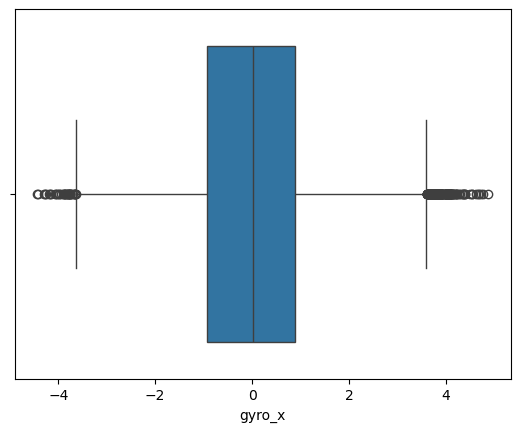

In [51]:
sns.boxplot(x=data.gyro_x)

In [52]:
max_limit=0.8888+1.5*1.8094999999999999
max_limit

3.6030499999999996

In [53]:
min_limit=-0.9207-1.5*1.8094999999999999
min_limit

-3.63495

In [54]:
data.loc[data['gyro_x']> max_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
3051,2017-6-30,20:55:7:473541021,viktor,0,1,0.2921,-1.0401,-0.1290,3.6203,-0.0482,3.1863
10384,2017-7-11,17:50:33:153665006,viktor,1,1,-0.0595,-0.7591,-0.2210,4.2095,-1.1343,1.7131
11941,2017-7-11,17:55:50:754446029,viktor,1,1,-0.0595,0.9394,0.1612,3.6571,-0.3990,3.5440
12255,2017-7-11,17:56:55:67677021,viktor,1,1,-0.0595,0.7473,0.1752,3.8617,2.0993,3.0872
12883,2017-7-11,17:59:13:270732998,viktor,1,1,-0.0595,-0.7591,-0.2210,3.8158,-0.2503,1.0515
...,...,...,...,...,...,...,...,...,...,...,...
65921,2017-7-4,19:46:16:911925971,viktor,0,0,0.3448,-1.2935,-0.4627,3.6740,0.6279,3.1544
71675,2017-7-6,18:45:28:200726985,viktor,0,1,0.2153,-1.3289,-0.1083,3.7517,1.4350,6.1466
73737,2017-7-6,18:53:22:876851022,viktor,0,1,-0.0595,0.0483,-0.6037,3.6999,1.1425,-0.9590
78583,2017-7-7,11:50:5:480479001,viktor,0,0,0.4138,-1.3342,-0.3756,3.7956,-0.8160,4.7429


In [55]:
data.loc[data['gyro_x']<min_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
12444,2017-7-11,17:57:33:669340014,viktor,1,1,-0.0595,0.0079,-0.7012,-3.8630,-1.2002,-1.2344
12640,2017-7-11,17:58:23:668157994,viktor,1,1,-0.0595,0.3787,-0.2573,-3.6546,-2.6273,-4.6280
13548,2017-7-11,18:1:28:865957975,viktor,1,1,-0.0595,-0.4976,-0.0995,-3.7646,-6.9557,-1.7011
13798,2017-7-11,18:2:19:870468974,viktor,1,1,-0.0595,-0.1024,-0.7970,-3.7036,-1.3734,-1.7167
14049,2017-7-11,18:3:1:68713009,viktor,1,1,-1.2420,-0.8847,-0.2210,-4.2582,-2.9323,-4.0612
15674,2017-7-15,18:11:35:438868999,viktor,1,1,-0.0595,0.5037,0.2280,-4.4276,1.5328,-1.5076
15701,2017-7-15,18:11:40:839106976,viktor,1,1,-0.0595,0.2059,0.3163,-4.0243,-1.1363,-3.0770
15743,2017-7-15,18:11:49:439447999,viktor,1,1,-0.0595,0.0703,-0.2210,-4.1589,-1.7990,-1.4788
15833,2017-7-15,18:12:17:840313017,viktor,1,1,-0.0595,0.4180,-0.0093,-3.6497,0.0413,-1.5848
16552,2017-7-15,18:14:34:639487028,viktor,1,1,-1.3744,-0.4055,0.0602,-3.7789,-1.1875,-1.8542


In [56]:
data.loc[data['gyro_x']> max_limit,'gyro_x']=np.median(data.gyro_x)

In [57]:
data.loc[data['gyro_x']< min_limit,'gyro_x']=np.median(data.gyro_x)

<Axes: xlabel='gyro_x'>

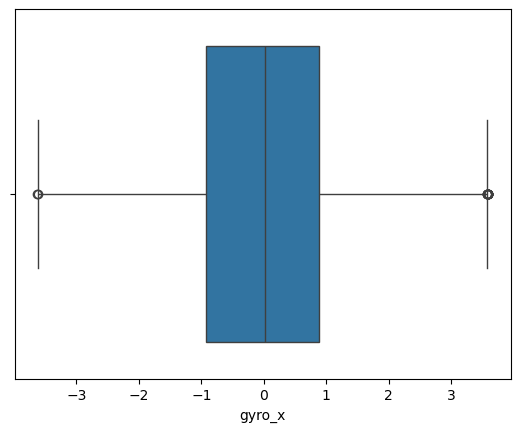

In [58]:
sns.boxplot(x=data.gyro_x)

## gyro_y

<Axes: xlabel='gyro_y'>

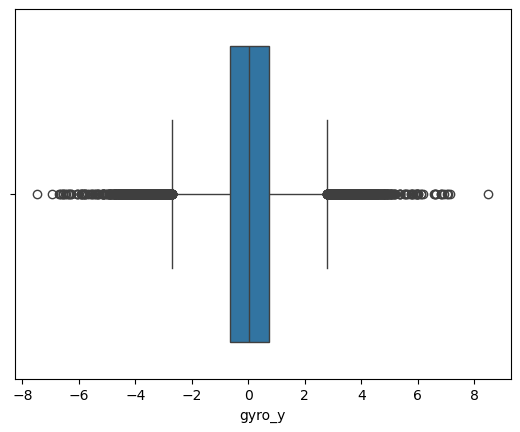

In [59]:
sns.boxplot(x=data.gyro_y)

In [60]:
max_limit=0.7337+1.5*1.3785500000000002
max_limit

2.801525

In [61]:
min_limit=-0.644825-1.5*1.3785500000000002
min_limit

-2.71265

In [62]:
data.loc[data['gyro_y']>max_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
806,2017-6-30,20:34:1:757506012,viktor,0,1,-0.0595,-0.8969,-0.4853,-1.0288,3.0830,3.2277
939,2017-6-30,20:34:45:640227019,viktor,0,1,-0.0595,-0.5313,-0.0497,2.3511,3.7946,-1.4452
949,2017-6-30,20:34:47:640263020,viktor,0,1,-0.0595,-1.0021,-0.3412,-1.3086,3.0251,3.5416
1162,2017-6-30,20:36:30:122624993,viktor,0,1,-0.0595,-1.3012,-0.5302,-1.7653,3.6325,3.5509
1225,2017-6-30,20:37:9:373520016,viktor,0,1,-0.0595,-1.1224,-0.3451,-2.1148,3.1223,3.8648
...,...,...,...,...,...,...,...,...,...,...,...
88228,2017-7-9,20:8:52:918063998,viktor,0,0,0.4471,-0.8132,-0.1947,0.0891,3.5109,0.3621
88296,2017-7-9,20:8:6:916352987,viktor,0,0,0.4508,-0.8620,-0.2102,0.4976,2.9574,0.5350
88348,2017-7-9,20:9:17:517454981,viktor,0,0,0.2878,-0.9886,-0.1019,-0.0195,2.8317,1.4174
88354,2017-7-9,20:9:18:716318011,viktor,0,0,0.2176,-0.8891,-0.0477,0.1856,3.0879,0.6965


In [63]:
data.loc[data['gyro_y']<min_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
913,2017-6-30,20:34:31:423546016,viktor,0,1,-0.0595,-0.7081,-0.4079,1.6027,-2.7397,-3.2870
919,2017-6-30,20:34:41:640215992,viktor,0,1,-0.0595,-0.6768,-0.2210,-0.7316,-4.0366,-3.6134
1060,2017-6-30,20:35:34:107367992,viktor,0,1,-0.0595,-1.4406,-0.2210,-0.6782,-3.0121,-2.4960
1072,2017-6-30,20:35:36:507089972,viktor,0,1,-0.0595,-1.2920,-0.2210,1.3712,-5.1272,-1.5158
1228,2017-6-30,20:37:9:972751975,viktor,0,1,0.5261,-0.6665,-0.4961,1.3273,-4.4403,-1.5054
...,...,...,...,...,...,...,...,...,...,...,...
88196,2017-7-9,20:8:46:517852008,viktor,0,0,0.7537,-0.9405,-0.5238,0.4714,-2.7695,-0.0929
88219,2017-7-9,20:8:51:116779983,viktor,0,0,0.2178,-0.8600,-0.0435,-0.0508,-4.0965,-1.6331
88240,2017-7-9,20:8:55:316920995,viktor,0,0,0.5744,-0.8277,-0.4402,0.4895,-2.9116,0.8089
88420,2017-7-9,20:9:32:115099012,viktor,0,0,0.3347,-0.9211,-0.2104,1.5429,-3.2006,2.4980


In [64]:
data.loc[data['gyro_y']>max_limit,'gyro_y']=np.median(data.gyro_y)

In [65]:
data.loc[data['gyro_y']<min_limit,'gyro_y']=np.median(data.gyro_y)

<Axes: xlabel='gyro_y'>

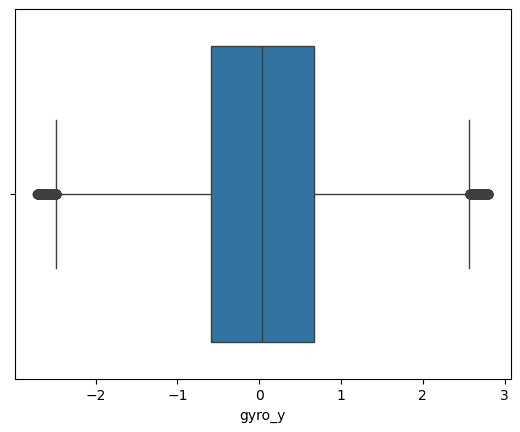

In [66]:
sns.boxplot(x=data.gyro_y)

## gyro_z

<Axes: xlabel='gyro_z'>

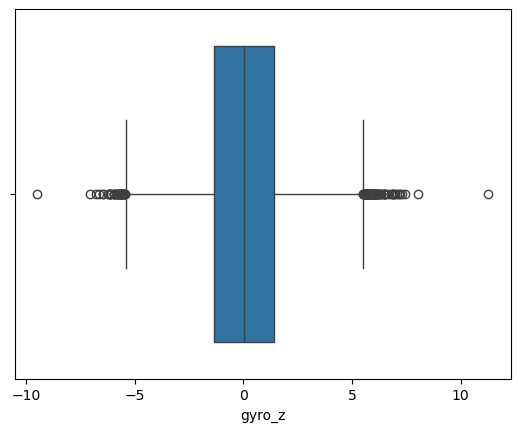

In [67]:
sns.boxplot(x=data.gyro_z)

In [68]:
max_limit=1.3982+1.5*2.74345
max_limit


5.513375000000001

In [69]:
min_max=-1.345125-1.5*2.74345
min_limit

-2.71265

In [70]:
data.loc[data['gyro_z']<min_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
23,2017-6-30,13:51:20:646055996,viktor,0,0,0.3275,-0.7846,-0.0344,0.0436,-0.3678,-2.9826
28,2017-6-30,13:51:21:645960986,viktor,0,0,0.2843,-0.9344,-0.0459,-0.3433,-0.1396,-3.1056
54,2017-6-30,13:51:34:979173004,viktor,0,0,0.2491,-0.8098,-0.0453,-0.2112,-0.0623,-2.8868
...,...,...,...,...,...,...,...,...,...,...,...
88126,2017-7-9,20:8:32:116945981,viktor,0,0,0.2756,-0.9124,-0.0158,-1.6198,0.6279,-3.0150
88197,2017-7-9,20:8:46:716655015,viktor,0,0,0.2141,-0.8830,-0.0158,-1.6101,-0.6994,-2.9960
88202,2017-7-9,20:8:47:716126978,viktor,0,0,0.5631,-1.0418,-0.2856,-0.5788,-0.7473,-2.8192
88263,2017-7-9,20:9:0:116747021,viktor,0,0,0.2474,-1.0509,-0.0940,-1.8918,0.0256,-2.7922


In [71]:
data.loc[data['gyro_z']>max_limit]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
1477,2017-6-30,20:39:38:856858015,viktor,0,1,0.7873,-0.9871,-0.2514,0.7953,0.7202,5.5529
1719,2017-6-30,20:41:21:539348006,viktor,0,1,0.5814,-0.4688,-0.0164,-0.6427,2.0104,5.7270
2111,2017-6-30,20:46:27:973538994,viktor,0,1,0.7034,-0.7935,-0.4780,0.3730,-0.5070,5.6894
2278,2017-6-30,20:48:23:855978012,viktor,0,1,0.2657,-0.6900,-0.4128,0.3714,1.0898,5.6596
2312,2017-6-30,20:48:30:655951023,viktor,0,1,0.7004,-0.8029,-0.2210,0.6982,-0.1620,6.0210
...,...,...,...,...,...,...,...,...,...,...,...
87444,2017-7-9,20:5:52:513512015,viktor,0,1,0.5993,-0.8008,-0.7657,1.6280,1.2730,5.7794
87600,2017-7-9,20:6:24:317048013,viktor,0,1,0.4192,-0.8820,-0.5423,0.9142,1.5288,6.1161
87608,2017-7-9,20:6:26:116167008,viktor,0,1,-0.0595,-0.6625,-0.2210,0.9775,1.6180,5.5810
87634,2017-7-9,20:6:31:317802011,viktor,0,1,0.8179,-1.2392,-0.8107,0.6880,-0.7749,6.1080


In [72]:
data.loc[data['gyro_z']>max_limit,'gyro_z']=np.median(data.gyro_z)

In [73]:
data.loc[data['gyro_z']<min_limit,'gyro_z']=np.median(data.gyro_z)

<Axes: xlabel='gyro_z'>

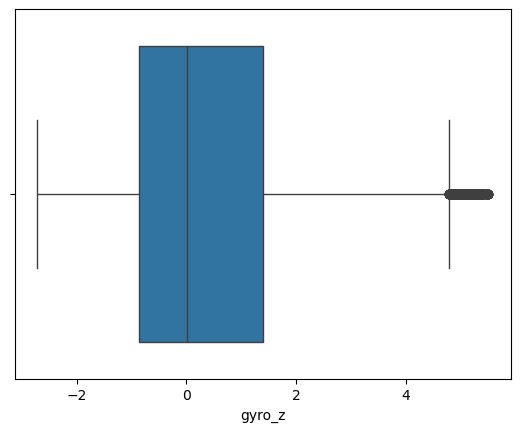

In [74]:
sns.boxplot(x=data.gyro_z)

In [75]:
data.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

### 3) Conversion of Categorical  data to Numrical  & Scaling of features 

In [76]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [77]:
lb=LabelEncoder()

In [78]:
ms=MinMaxScaler()

In [79]:
data.date=lb.fit_transform(data.date)

In [80]:
data.time=lb.fit_transform(data.time)

In [81]:
data.time

0         3280
1         3281
2         3282
3         3283
4         3284
         ...  
88583    87701
88584    87703
88585    87705
88586    87708
88587    87709
Name: time, Length: 88588, dtype: int32

In [82]:
data.date

0         0
1         0
2         0
3         0
4         0
         ..
88583    11
88584    11
88585    11
88586    11
88587    11
Name: date, Length: 88588, dtype: int32

In [83]:
data.time=ms.fit_transform(data[['time']])

In [84]:
data.time

0        0.037026
1        0.037037
2        0.037048
3        0.037060
4        0.037071
           ...   
88583    0.989999
88584    0.990021
88585    0.990044
88586    0.990078
88587    0.990089
Name: time, Length: 88588, dtype: float64

In [85]:
data.date=ms.fit_transform(data[['date']])

In [86]:
data.date

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88583    1.0
88584    1.0
88585    1.0
88586    1.0
88587    1.0
Name: date, Length: 88588, dtype: float64

# Feature Selection

### 1)Dropping Redundant Column:

In [87]:
data.drop('username' ,axis=1,inplace=True)

In [88]:
data

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.037026,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,0.0069
1,0.0,0.037037,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.0,0.037048,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.0,0.037060,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,0.0069
4,0.0,0.037071,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
88583,1.0,0.989999,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,1.0,0.990021,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,1.0,0.990044,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,1.0,0.990078,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [89]:
data.drop('activity',axis=1).corr()

,date,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
date,1.000000,0.197195,-0.470160,0.280711,-0.016597,-0.067121,0.017445,0.026117,0.053179
time,0.197195,1.000000,-0.318196,0.246169,0.460928,0.105277,0.027729,-0.003616,0.086010
wrist,-0.470160,-0.318196,1.000000,-0.662193,0.074399,0.148917,-0.026955,-0.038447,-0.059185
acceleration_x,0.280711,0.246169,-0.662193,1.000000,-0.028784,-0.182780,-0.023407,0.070453,0.102559
acceleration_y,-0.016597,0.460928,0.074399,-0.028784,1.000000,0.021257,-0.033215,0.056990,-0.003256
acceleration_z,-0.067121,0.105277,0.148917,-0.182780,0.021257,1.000000,-0.045228,-0.031487,-0.022287
gyro_x,0.017445,0.027729,-0.026955,-0.023407,-0.033215,-0.045228,1.000000,0.104177,0.307786
gyro_y,0.026117,-0.003616,-0.038447,0.070453,0.056990,-0.031487,0.104177,1.000000,0.237590
gyro_z,0.053179,0.086010,-0.059185,0.102559,-0.003256,-0.022287,0.307786,0.237590,1.000000


## Finding Correlation  between Features

<Axes: >

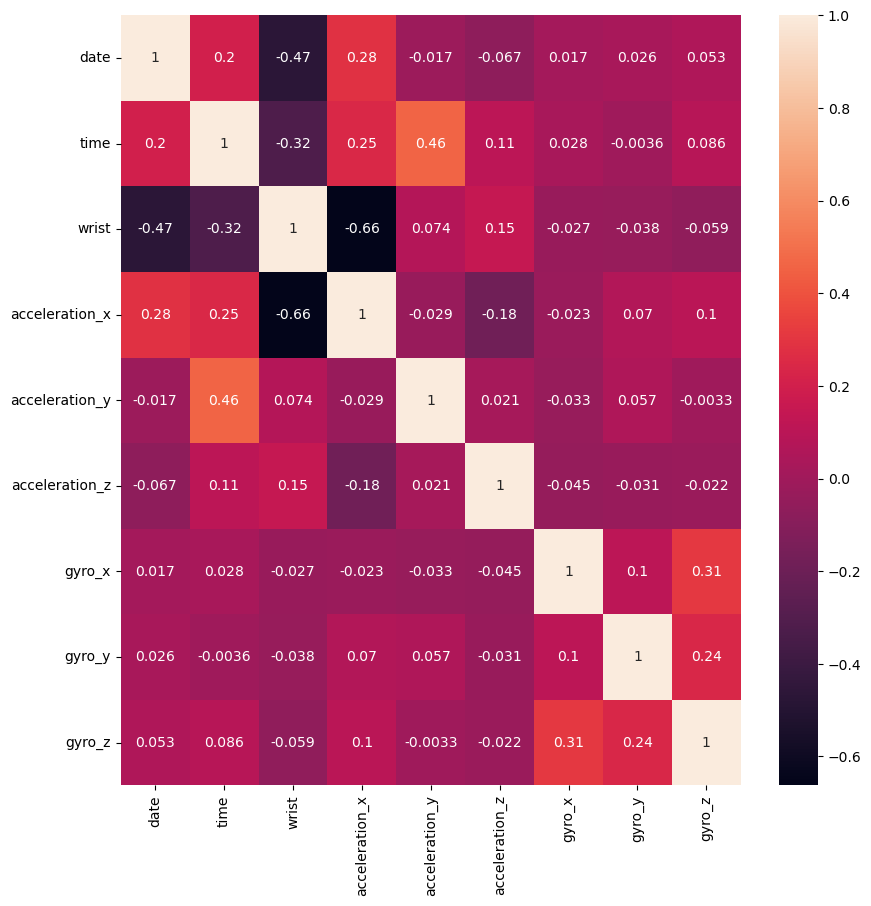

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop('activity', axis = 1).corr(), annot = True)

#### There is no corrleation found between any two columns 

# Model Creation

In [91]:
x=data.drop('activity',axis=1)
x

,date,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.037026,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,0.0069
1,0.0,0.037037,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.0,0.037048,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.0,0.037060,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,0.0069
4,0.0,0.037071,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...
88583,1.0,0.989999,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,1.0,0.990021,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,1.0,0.990044,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,1.0,0.990078,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [92]:
y=data.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=42)

In [95]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67326, 9)
(21262, 9)
(67326,)
(21262,)


## Logistics_Regression 

In [197]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [198]:
LR.fit(x_train,y_train)

LogisticRegression()

In [199]:
y_pred=LR.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [200]:
x_test

,date,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
57800,0.090909,0.518056,0,-0.0595,-0.4641,-0.2210,0.2961,-1.5709,-1.6958
53690,0.545455,0.972569,1,-0.1132,0.4044,-0.2144,1.7535,-0.7964,3.5975
75294,0.818182,0.668439,0,-0.0595,-1.8281,-0.2210,-0.1521,-0.3216,2.7630
16113,0.363636,0.524061,1,0.0571,0.5462,-0.1377,0.7485,0.0477,2.0552
88456,1.000000,0.992900,0,0.3597,-1.2908,-0.3557,-0.8036,-0.7982,-1.3781
...,...,...,...,...,...,...,...,...,...
9381,0.272727,0.463556,1,0.0208,-0.5043,0.2691,0.2225,-0.5957,-1.7486
11566,0.272727,0.488175,1,0.2325,-0.7076,0.2374,-1.2124,-0.1643,0.2289
86768,1.000000,0.933049,0,0.5972,-1.0141,-0.3522,0.7481,-0.4093,3.0925
2428,0.000000,0.943863,0,0.1522,0.5670,-0.1219,-0.8155,1.0935,-1.4262


In [201]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# Model Evaluation

In [202]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [203]:
acc=accuracy_score(y_test,y_pred)
acc

0.9247483773868874

In [204]:
pr=precision_score(y_test,y_pred)
pr

0.9190480652112808

In [205]:
re=recall_score(y_test,y_pred)
re

0.930203888098625

In [206]:
pd.crosstab(y_test,y_pred)

col_0,0,1
activity,,
0,9853,864
1,736,9809


In [207]:
f1_score(y_test,y_pred)

0.9245923272692996

In [208]:
roc_auc_score(y_test,y_pred)

0.9247921558623199

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10717
           1       0.92      0.93      0.92     10545

    accuracy                           0.92     21262
   macro avg       0.92      0.92      0.92     21262
weighted avg       0.92      0.92      0.92     21262



# Cross Validation

In [489]:
LR1=LogisticRegression()

In [490]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LR1,x,y,scoring='f1',cv=5)
cv

array([0.90533929, 0.97463747, 0.94823404, 0.85015514, 0.88290292])

In [491]:
cv.mean()

0.912253771299528

In [492]:
cv.std()

0.04461351581307651

# Hyperparameter tunning 

In [493]:
from sklearn.model_selection import GridSearchCV

In [494]:
LR2=LogisticRegression()

In [498]:
param_grid={'C':[0.1,1,10,100,1000],'tol':[1, 0.1, 0.01, 0.001, 0.0001]}

In [499]:
grid=GridSearchCV(LR2,param_grid,scoring='f1',cv=5,verbose=3)

In [500]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......................C=0.1, tol=1;, score=0.000 total time=   0.0s
[CV 2/5] END ......................C=0.1, tol=1;, score=0.000 total time=   0.0s
[CV 3/5] END ......................C=0.1, tol=1;, score=0.000 total time=   0.0s
[CV 4/5] END ......................C=0.1, tol=1;, score=0.000 total time=   0.0s
[CV 5/5] END ......................C=0.1, tol=1;, score=0.000 total time=   0.0s
[CV 1/5] END ....................C=0.1, tol=0.1;, score=0.830 total time=   0.0s
[CV 2/5] END ....................C=0.1, tol=0.1;, score=0.823 total time=   0.0s
[CV 3/5] END ....................C=0.1, tol=0.1;, score=0.823 total time=   0.0s
[CV 4/5] END ....................C=0.1, tol=0.1;, score=0.826 total time=   0.0s
[CV 5/5] END ....................C=0.1, tol=0.1;, score=0.823 total time=   0.0s
[CV 1/5] END ...................C=0.1, tol=0.01;, score=0.914 total time=   0.0s
[CV 2/5] END ...................C=0.1, tol=0.01

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'tol': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [219]:
grid.best_params_

{'C': 1000, 'tol': 1e-05}

In [220]:
grid.best_estimator_

LogisticRegression(C=1000, tol=1e-05)

In [221]:
LR3=LogisticRegression(C= 0.1, tol=1e-05)

In [222]:
LR3.fit(x_train,y_train)

LogisticRegression(C=0.1, tol=1e-05)

In [223]:
y_pred1=LR3.predict(x_test)
y_pred1

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [224]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of LogisticRegression

## Testing

In [225]:
accuracy_score(y_test,y_pred1)

0.9248424419151537

In [226]:
precision_score(y_test,y_pred1)

0.9198498357578602

In [227]:
recall_score(y_test,y_pred1)

0.9294452347083926

In [228]:
roc_auc_score(y_test,y_pred1)

0.9248793776415901

In [229]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
activity,,
0,9863,854
1,744,9801


In [230]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10717
           1       0.92      0.93      0.92     10545

    accuracy                           0.92     21262
   macro avg       0.92      0.92      0.92     21262
weighted avg       0.92      0.92      0.92     21262



In [231]:
f1_score(y_test,y_pred1)

0.924622641509434

## Training

In [232]:
y_pred_lrhtr=LR3.predict(x_train)

In [233]:
accuracy_score(y_train,y_pred_lrhtr)

0.9230460743249265

In [234]:
f1_score(y_train,y_pred_lrhtr)

0.9238077030544567

In [235]:
recall_score(y_train,y_pred_lrhtr)

0.9287108219988173

In [236]:
precision_score(y_train,y_pred_lrhtr)

0.9189560841452353

In [237]:
pd.crosstab(y_train,y_pred_lrhtr)

col_0,0,1
activity,,
0,30736,2770
1,2411,31409


In [238]:
roc_auc_score(y_train,y_pred_lrhtr)

0.9230195308585382

## SVM

In [96]:
from sklearn.svm import SVC

In [97]:
sv=SVC()

In [98]:
sv.fit(x_train,y_train)

SVC()

In [99]:
y_pred_sv=sv.predict(x_test)
y_pred_sv

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [100]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [102]:
f1_score(y_test,y_pred_sv)

0.9858900660363913

In [105]:
acc=accuracy_score(y_test,y_pred_sv)
acc

0.986031417552441

In [106]:
recall_score(y_test,y_pred_sv)

0.9839734471313418

In [107]:
precision_score(y_test,y_pred_sv)

0.9878141660319878

In [108]:
pd.crosstab(y_test,y_pred_sv)

col_0,0,1
activity,,
0,10589,128
1,169,10376


In [109]:
roc_auc_score(y_test,y_pred_sv)

0.9860149030935239

In [110]:
y_pred_sv1=sv.predict(x_train)
y_pred_sv1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [111]:
accuracy_score(y_train,y_pred_sv1)

0.9863945578231292

In [112]:
from collections import Counter
print(Counter(y_train))

Counter({1: 33820, 0: 33506})


## Cross Validation

In [113]:
sv1=SVC()

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
cv=cross_val_score(sv1,x,y,scoring='f1',cv=3)
cv

array([0.95471147, 0.98033689, 0.91320498])

In [116]:
cv.mean()

0.9494177770520776

In [117]:
cv.std()

0.027660930892639005

## Hyperparameter Tunning

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
sv2=SVC()

In [120]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[0.00001,0.0001,0.001,0.01,0.1]}

In [122]:
grid=RandomizedSearchCV(sv2,param_grid,scoring='f1',cv=2,verbose=3)

In [123]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END .................C=1, gamma=0.0001;, score=0.853 total time= 4.6min
[CV 2/2] END .................C=1, gamma=0.0001;, score=0.850 total time= 4.6min
[CV 1/2] END .................C=1000, gamma=0.1;, score=0.995 total time=  24.0s
[CV 2/2] END .................C=1000, gamma=0.1;, score=0.994 total time=  23.3s
[CV 1/2] END ...............C=100, gamma=0.0001;, score=0.938 total time= 1.6min
[CV 2/2] END ...............C=100, gamma=0.0001;, score=0.935 total time= 1.5min
[CV 1/2] END ...............C=1000, gamma=0.001;, score=0.944 total time= 1.3min
[CV 2/2] END ...............C=1000, gamma=0.001;, score=0.943 total time= 1.2min
[CV 1/2] END ..................C=100, gamma=0.1;, score=0.993 total time=  19.6s
[CV 2/2] END ..................C=100, gamma=0.1;, score=0.993 total time=  19.3s
[CV 1/2] END ...................C=1, gamma=0.01;, score=0.939 total time= 1.4min
[CV 2/2] END ...................C=1, gamma=0.01;

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1]},
                   scoring='f1', verbose=3)

In [124]:
grid.best_params_

{'gamma': 0.1, 'C': 1000}

In [125]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [126]:
sv3=SVC(C=1000,gamma=0.1)

In [127]:
sv3

SVC(C=1000, gamma=0.1)

In [128]:
sv3.fit(x_train,y_train)

SVC(C=1000, gamma=0.1)

In [129]:
y_pred_h=sv3.predict(x_test)
y_pred_h

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [130]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of SVM

## Testing

In [131]:
accuracy_score(y_test,y_pred_h)

0.9945912896246826

In [132]:
recall_score(y_test,y_pred_h)

0.9941204362256993

In [133]:
precision_score(y_test,y_pred_h)

0.994969627942293

In [134]:
f1_score(y_test,y_pred_h)

0.9945448508135287

In [135]:
pd.crosstab(y_test,y_pred_h)

col_0,0,1
activity,,
0,10664,53
1,62,10483


In [136]:
roc_auc_score(y_test,y_pred_h)

0.9945875111986012

## Training

In [137]:
y_pred_svtr=sv3.predict(x_train)

In [138]:
accuracy_score(y_train,y_pred_svtr)

0.9974155601105071

In [139]:
f1_score(y_train,y_pred_svtr)

0.9974268729111827

In [140]:
recall_score(y_train,y_pred_svtr)

0.9971614429331757

In [141]:
precision_score(y_train,y_pred_svtr)

0.997692444234069

In [142]:
pd.crosstab(y_train,y_pred_svtr)

col_0,0,1
activity,,
0,33428,78
1,96,33724


In [143]:
roc_auc_score(y_train,y_pred_svtr)

0.9974167508344622

# Decision Tree

In [288]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [289]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [290]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [291]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [292]:
accuracy_score(y_test,y_pred_dt)

0.9951556767942809

In [293]:
precision_score(y_test,y_pred_dt)

0.9953510436432638

In [294]:
recall_score(y_test,y_pred_dt)

0.9948790896159317

In [295]:
f1_score(y_test,y_pred_dt)

0.9951150106710932

In [296]:
roc_auc_score(y_test,y_pred_dt)

0.995153457283472

In [297]:
pd.crosstab(y_test,y_pred_dt)

col_0,0,1
activity,,
0,10668,49
1,54,10491


In [298]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10717
           1       1.00      0.99      1.00     10545

    accuracy                           1.00     21262
   macro avg       1.00      1.00      1.00     21262
weighted avg       1.00      1.00      1.00     21262



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
dt1=DecisionTreeClassifier()

In [301]:
cv=cross_val_score(dt,x,y,scoring='f1',cv=5)
cv

array([0.76639773, 0.98420149, 0.94104308, 0.94889488, 0.83608624])

## Hyperparameter Tunning

In [302]:
from sklearn.model_selection import RandomizedSearchCV

In [303]:
list(range(1, 20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [304]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

In [305]:
dt2 = DecisionTreeClassifier()

In [306]:
grid = RandomizedSearchCV(dt2 ,params, scoring='f1', cv =5, verbose = 3, n_jobs=-1)

In [307]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ('best', 'random')},
                   scoring='f1', verbose=3)

In [308]:
grid.best_params_

{'splitter': 'random',
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 19,
 'criterion': 'gini'}

In [309]:
grid.best_score_

0.9945377938700435

In [310]:
dt3=DecisionTreeClassifier()
dt3

DecisionTreeClassifier()

In [311]:
dt3.fit(x_train,y_train)
dt3

DecisionTreeClassifier()

In [312]:
y_pred_hdt=dt3.predict(x_test)
y_pred_hdt

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [313]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of Decision Tree

## Testing

In [314]:
accuracy_score(y_test,y_pred_hdt)

0.9953908381149469

In [315]:
f1_score(y_test,y_pred_hdt)

0.9953541291362473

In [316]:
recall_score(y_test,y_pred_hdt)

0.995542911332385

In [317]:
precision_score(y_test,y_pred_hdt)

0.9951654185230827

In [318]:
pd.crosstab(y_test,y_pred_hdt)

col_0,0,1
activity,,
0,10666,51
1,47,10498


In [319]:
roc_auc_score(y_test,y_pred_hdt)

0.9953920584468214

## Training

In [320]:
y_pred_hdt_tr=dt3.predict(x_train)

In [321]:
accuracy_score(y_train,y_pred_hdt_tr)

1.0

In [322]:
f1_score(y_train,y_pred_hdt_tr)

1.0

In [323]:
recall_score(y_train,y_pred_hdt_tr)

1.0

In [324]:
precision_score(y_train,y_pred_hdt_tr)

1.0

In [325]:
pd.crosstab(y_train,y_pred_hdt_tr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [326]:
roc_auc_score(y_train,y_pred_hdt_tr)

1.0

# Random Forest

In [327]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)

In [328]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [329]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [330]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [331]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [332]:
accuracy_score(y_test,y_pred_rf)

0.9988241933966702

In [333]:
precision_score(y_test,y_pred_rf)

0.9981060606060606

In [334]:
recall_score(y_test,y_pred_rf)

0.9995258416311048

In [335]:
roc_auc_score(y_test,y_pred_rf)

0.9988298238667794

In [336]:
f1_score(y_test,y_pred_rf)

0.9988154465766406

In [337]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1
activity,,
0,10697,20
1,5,10540


In [338]:
y_pred_rf1=rf.predict(x_train)
y_pred_rf1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [339]:
accuracy_score(y_train,y_pred_rf1)

1.0

In [340]:
recall_score(y_train,y_pred_rf1)

1.0

# cross validation

In [341]:
from sklearn.model_selection import cross_val_score

In [342]:
rf1 = RandomForestClassifier()

In [355]:
cv = cross_val_score(rf1,x,y,scoring='f1',cv=2)
cv

array([0.90259026, 0.94415833])

In [356]:
cv.mean()

0.9233742964629679

In [357]:
cv.std()

0.020784035096938436

# hyperparameter tunning

In [358]:
from sklearn.model_selection import RandomizedSearchCV


In [359]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [360]:
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [381]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [362]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [363]:
rf2 = RandomForestClassifier(random_state=42)

In [364]:
rscv = RandomizedSearchCV(estimator=rf2, scoring='f1',param_distributions=random_grid, n_iter=20, cv=2, 
                               verbose=2, random_state=42, n_jobs=-1)

In [365]:
rscv.fit(x_train,y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [366]:
y_pred_rfhte=rscv.predict(x_test)

## Model Evaluation of Random Forest

## Testing

In [367]:
accuracy_score(y_test,y_pred_rfhte)

0.9988712256608033

In [368]:
recall_score(y_test,y_pred_rfhte)

0.9996206733048838

In [369]:
f1_score(y_test,y_pred_rfhte)

0.9988628825926277

In [370]:
precision_score(y_test,y_pred_rfhte)

0.9981062399393997

In [371]:
pd.crosstab(y_test,y_pred_rfhte)

col_0,0,1
activity,,
0,10697,20
1,4,10541


In [372]:
roc_auc_score(y_test,y_pred_rfhte)

0.9988772397036689

## Training

In [373]:
y_pred_rfhtr=rscv.predict(x_train)

In [374]:
accuracy_score(y_train,y_pred_rfhtr)

0.9999851468971869

In [375]:
recall_score(y_train,y_pred_rfhtr)

1.0

In [376]:
f1_score(y_train,y_pred_rfhtr)

0.9999852160671782

In [377]:
precision_score(y_train,y_pred_rfhtr)

0.9999704325714792

In [378]:
pd.crosstab(y_train,y_pred_rfhtr)

col_0,0,1
activity,,
0,33505,1
1,0,33820


In [379]:
roc_auc_score(y_train,y_pred_rfhtr)

0.9999850772995881

# KNN

In [380]:
from sklearn.neighbors import KNeighborsClassifier

In [384]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    error=(y_test !=y_pred_knn).sum()/len(y_test)
    error_rate.append(error)

In [385]:
error_rate

[0.010017872260370615,
 0.013639356598626659,
 0.010300065845169787,
 0.012933872636628728,
 0.011522904712632866,
 0.012980904900761923,
 0.012322453202897187,
 0.013357163013827486,
 0.013027937164895118,
 0.014344840560624588]

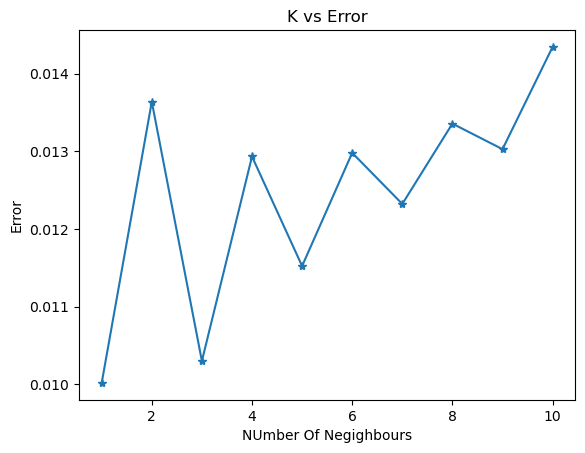

In [387]:
plt.plot(range(1,11),error_rate,marker='*')
plt.xlabel('NUmber Of Negighbours')
plt.ylabel('Error')
plt.title('K vs Error')
plt.show()

In [388]:

knn=KNeighborsClassifier(n_neighbors=3)

In [389]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [390]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [391]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [392]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,f1_score

In [393]:
accuracy_score(y_test,y_pred_knn)

0.9896999341548303

In [394]:
recall_score(y_test,y_pred_knn)

0.9848269321953532

In [395]:
precision_score(y_test,y_pred_knn)

0.9943508234392953

In [396]:
f1_score(y_test,y_pred_knn)

0.989565963123541

In [397]:
roc_auc_score(y_test,y_pred_knn)

0.9896608300987964

## Cross validation

In [398]:
from sklearn.model_selection import cross_val_score

In [399]:
knn1=KNeighborsClassifier()

In [400]:
cv=cross_val_score(knn1,x,y,cv=5,scoring='f1')
cv

array([0.97856371, 0.99450892, 0.97264789, 0.89350649, 0.9632228 ])

In [401]:
cv.mean()

0.9604899628505235

In [402]:
cv.std()

0.035002909553442714

## Hyperparameter Tunning

In [403]:
from sklearn.model_selection import GridSearchCV

In [404]:
knn2=KNeighborsClassifier()

In [405]:
param_grid_knn={'n_neighbors':[3,5,7,9],'weights':['unifrom','distance'],'metric':['euclidean','manhattan']}

In [406]:
grid_knn=GridSearchCV(knn2,param_grid_knn,scoring='f1',cv=5,verbose=3)

In [407]:
grid_knn.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=unifrom;, score=nan total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.988 total time=   1.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.988 total time=   0.9s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.989 total time=   0.9s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.985 total time=   0.8s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.989 total time=  

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['unifrom', 'distance']},
             scoring='f1', verbose=3)

In [408]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [409]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [410]:
knn3=KNeighborsClassifier(metric='manhattan', weights='distance')

In [411]:
knn3.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [412]:
y_pred_knn_h=knn3.predict(x_test)
y_pred_knn_h

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Model Evaluation of KNN

### Testing 

In [413]:
accuracy_score(y_test,y_pred_knn_h)

0.9929921926441538

In [414]:
recall_score(y_test,y_pred_knn_h)

0.9891891891891892

In [415]:
f1_score(y_test,y_pred_knn_h)

0.9929084765123031

In [416]:
precision_score(y_test,y_pred_knn_h)

0.9966558379514618

In [417]:
pd.crosstab(y_test,y_pred_knn_h)

col_0,0,1
activity,,
0,10682,35
1,114,10431


In [418]:
roc_auc_score(y_test,y_pred_knn_h)

0.9929616749342418

### Training

In [419]:
y_pred_knnhtr=knn3.predict(x_train)
y_pred_knnhtr

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [420]:
accuracy_score(y_train,y_pred_knnhtr)

1.0

In [421]:
recall_score(y_train,y_pred_knnhtr)

1.0

In [422]:
f1_score(y_train,y_pred_knnhtr)

1.0

In [423]:
precision_score(y_train,y_pred_knnhtr)

1.0

In [424]:
pd.crosstab(y_train,y_pred_knnhtr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [425]:
roc_auc_score(y_train,y_pred_knnhtr)

1.0

# XGBoost

In [426]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data

GradientBoostingClassifier()

In [427]:
y_gbm = gbm.predict(x_test)#predicting the price
y_gbm

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [428]:
y_gbm_train = gbm.predict(x_train)

In [429]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor = accuracy_score(y_test,y_gbm)
accu_scor

0.9975543222650738

In [430]:
precision_score(y_test,y_gbm)

0.9957478975715771

In [431]:
recall_score(y_test,y_gbm)

0.9993361782835467

In [432]:
f1_score(y_test,y_gbm)

0.9975388110564181

In [433]:
roc_auc_score(y_test,y_gbm)

0.997568621007034

In [434]:
accu_scor_train = accuracy_score(y_train, y_gbm_train)
accu_scor_train

0.9977571814752102

In [435]:
print(classification_report(y_train, y_gbm_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33506
           1       1.00      1.00      1.00     33820

    accuracy                           1.00     67326
   macro avg       1.00      1.00      1.00     67326
weighted avg       1.00      1.00      1.00     67326



In [436]:
pd.crosstab(y_train, y_gbm_train)

col_0,0,1
activity,,
0,33385,121
1,30,33790


## Cross Validation

In [437]:
from sklearn.model_selection import cross_val_score

In [438]:
gbm1=GradientBoostingClassifier()

In [439]:
cv=cross_val_score(gbm1,x,y,cv=5,scoring='f1')
cv

array([0.78867183, 0.99977455, 0.96112867, 0.94500111, 0.91327871])

In [440]:
cv.mean()

0.921570974788302

In [441]:
cv.std()

0.0720562649353233

## Hyperparameter Tunning

In [442]:
from sklearn.model_selection import GridSearchCV

In [443]:
gbm2=GradientBoostingClassifier()

In [444]:
param_grid_xgb= {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [445]:
grid=GridSearchCV(gbm2,param_grid_xgb,scoring='f1',cv=5,verbose=3)

In [446]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.997 total time=   9.9s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.998 total time=  10.5s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.996 total time=   9.8s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.998 total time=  10.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.997 total time=  10.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  13.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  12.8s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.996 total time=  15.9s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  14.4s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.7;, score=0.998 total time=  13.8s
[CV 1/5] END learn

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='f1', verbose=3)

In [447]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1}

In [448]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=7, subsample=1)

In [449]:
gbm3=GradientBoostingClassifier(max_depth=7, subsample=1)

In [450]:
gbm3.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7, subsample=1)

In [451]:
y_pred_gbm_hte=gbm3.predict(x_test)
y_pred_gbm_hte

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [452]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Testing

In [453]:
accuracy_score(y_test,y_pred_gbm_hte)

0.9995767096228012

In [454]:
recall_score(y_test,y_pred_gbm_hte)

0.9998103366524419

In [455]:
f1_score(y_test,y_pred_gbm_hte)

0.9995733586157858

In [456]:
precision_score(y_test,y_pred_gbm_hte)

0.9993364928909952

In [457]:
pd.crosstab(y_test,y_pred_gbm_hte)

col_0,0,1
activity,,
0,10710,7
1,2,10543


In [458]:
roc_auc_score(y_test,y_pred_gbm_hte)

0.9995785843941505

## Training

In [459]:
y_pred_gbm_htr=gbm3.predict(x_train)
y_pred_gbm_htr

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [460]:
accuracy_score(y_train,y_pred_gbm_htr)

1.0

In [461]:
recall_score(y_train,y_pred_gbm_htr)

1.0

In [462]:
precision_score(y_train,y_pred_gbm_htr)

1.0

In [463]:
f1_score(y_train,y_pred_gbm_htr)

1.0

In [464]:
pd.crosstab(y_train,y_pred_gbm_htr)

col_0,0,1
activity,,
0,33506,0
1,0,33820


In [465]:
roc_auc_score(y_train,y_pred_gbm_htr)

1.0

# Bagging

In [466]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()

In [467]:
bc.fit(x_train,y_train)
bc

BaggingClassifier()

In [468]:
y_pred_bc=bc.predict(x_test)
y_pred_bc

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [469]:
y_test.values

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [470]:
accuracy_score(y_pred_bc,y_test)

0.9977424513216067

In [471]:
f1_score(y_test,y_pred_bc)

0.9977259806708357

In [472]:
precision_score(y_test,y_pred_bc)

0.9968758875319511

In [473]:
recall_score(y_test,y_pred_bc)

0.9985775248933144

In [474]:
roc_auc_score(y_test,y_pred_bc)

0.9977491524811818

In [475]:
import pandas as pd

## Without Hyperparameter Tunning

In [504]:
dic1 = {'Algorithm Name':['Logistic_regrssion','SVM','KNN','Decision_tree','Random_forest','XGBoost','Bagging'],
     'accurancy_score':[0.9311,0.9311,0.9951,0.9946,0.9987,0.9981,0.9965],
     'presion_scroe':[0.9292,0.9938,0.9973,0.9945,0.9980,0.9975,0.9959],
     'recall_score':[0.9322,0.9921,0.9927,0.9946,0.9995,0.9987,0.9970],
     'F1_score':[0.9307,0.9929,0.9950,0.9946,0.9987,0.9981,0.9964],
     'roc_uc_score':[0.9312,0.9930,0.9950,0.9946,0.9987,0.9981,0.9965]}

In [505]:
pd.DataFrame(dic1)

,Algorithm Name,accurancy_score,presion_scroe,recall_score,F1_score,roc_uc_score
0,Logistic_regrssion,0.9311,0.9292,0.9322,0.9307,0.9312
1,SVM,0.9311,0.9938,0.9921,0.9929,0.9930
2,KNN,0.9951,0.9973,0.9927,0.9950,0.9950
3,Decision_tree,0.9946,0.9945,0.9946,0.9946,0.9946
4,Random_forest,0.9987,0.9980,0.9995,0.9987,0.9987
5,XGBoost,0.9981,0.9975,0.9987,0.9981,0.9981
6,Bagging,0.9965,0.9959,0.9970,0.9964,0.9965


## With Hyperparameter Tunning

In [502]:
dic2 = {'Algorithm Name':['Logistic_regrssion','SVM','KNN','Decision_tree','Random_forest','XGBoost','Bagging'],
     'accuracy_score':[0.9310977330448688,0.9973191609444079,0.9962374188693444,0.9949675477377481,0.9989182579249365,0.9996237418869345,0.9967077415106763],
     'precision_scroe':[0.9293550217514659,0.9973191609444079,0.9986657771847899,0.9948795751943865,0.9982951316537223,0.999431225708598,0.9967077415106763],
     'recall_score':[0.9319108582266477,0.9963963963963964,0.9937411095305833,0.9949739212897107,0.9995258416311048,0.9998103366524419,0.9971550497866287],
     'F1_score':[0.9307455621301773,0.9972948602344455,0.9961973571632284,0.9949267460054052,0.9989101075676443,0.999620745235612,0.9966824644549763],
     'roc_uc_score':[0.9311042580766532,0.997311756096864,0.9962173869011506,0.9948795751943865,0.9982951316537223,0.99753741238871,0.9967113309957685]}

In [506]:
pd.DataFrame(dic1)

,Algorithm Name,accurancy_score,presion_scroe,recall_score,F1_score,roc_uc_score
0,Logistic_regrssion,0.9311,0.9292,0.9322,0.9307,0.9312
1,SVM,0.9311,0.9938,0.9921,0.9929,0.9930
2,KNN,0.9951,0.9973,0.9927,0.9950,0.9950
3,Decision_tree,0.9946,0.9945,0.9946,0.9946,0.9946
4,Random_forest,0.9987,0.9980,0.9995,0.9987,0.9987
5,XGBoost,0.9981,0.9975,0.9987,0.9981,0.9981
6,Bagging,0.9965,0.9959,0.9970,0.9964,0.9965


## Model Performance Insights



### Top Performing Models:

##### XGBoost:
With an accuracy score of 0.9996 and a corresponding F1 score of 0.9996, XGBoost stands out as the best-performing model. Its high precision (0.9994) and recall (0.9998) indicate it effectively balances the identification of both classes, minimizing both false positives and false negatives.

##### Random Forest:
Close behind, Random Forest achieves an accuracy of 0.9989 and an F1 score of 0.9989. Its performance metrics reflect its capability in handling the classification task robustly.

##### Solid Performance of Other Models:

SVM and KNN deliver respectable results, with accuracy scores around 0.9973 and 0.9962, respectively. While they perform well, they are slightly less effective than the tree-based methods, particularly in terms of the F1 score and precision.

##### Logistic Regression: 
This model, with the lowest accuracy (0.9311), indicates that it may not be well-suited for the complexity of this dataset. It struggles to effectively separate the two classes compared to the more sophisticated models.

##### Implications of Hyperparameter Tuning

Since hyperparameter tuning has already been conducted, the observed performance metrics suggest that the models are optimally configured for this specific dataset. This tuning has likely maximized their ability to learn from the features provided, making them well-prepared for deployment in real-world scenarios.

##### Recommendations for Implementation

##### Model Selection:
XGBoost and Random Forest are highly recommended for practical use in this application due to their outstanding predictive capabilities.

##### Real-time Application:
With the high accuracy and efficiency of these models, they could be integrated into real-time systems, such as fitness trackers or health monitoring devices, to accurately classify user activity.

##### Monitoring and Maintenance: 
It’s essential to continuously monitor the models’ performance as new data comes in. Periodic retraining may be necessary to maintain accuracy, especially if user behavior patterns change over time.

##### Feature Importance Analysis:
Conduct a feature importance analysis to identify which sensor readings contribute most to the model's predictions. This can guide future data collection efforts and help in refining the model.

##### Conclusion

The hyperparameter tuning has enhanced the models’ performance, particularly for XGBoost and Random Forest, making them exceptional choices for classifying walking versus running based on sensor data. Their high accuracy, precision, and recall indicate readiness for deployment in practical applications.

In [144]:
pwd

'C:\\Users\\A\\Downloads\\project\\PRCP-1013-WalkRunClass\\Data'